**Goal**: Predict the time to calculate a full $44339^2$ element correlation matrix based on timings for smaller matrices

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import linregress
import numpy as np

In [3]:
N = [10.,100.,500.,1000.,2000.,10.,100.,1000.,2000.,9740.]
t = [1.16e-3,85.2e-3,1.71,6.71,26.5,27e-3,80.7e-3,6.83,26.6,10*60.+38]

<IPython.core.display.Javascript object>


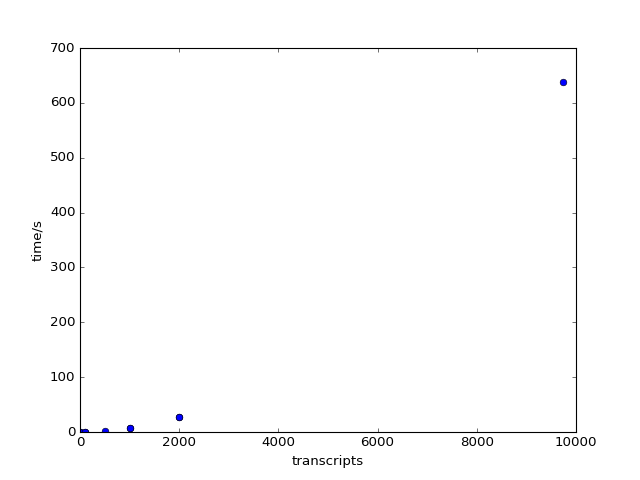

In [4]:
fig = plt.figure()
plt.plot(N,t,"bo")
plt.xlabel("transcripts")
plt.ylabel("time/s")

We expect quadratic scaling.  More generally, the times should fit:

$t = aN^b$

This is linear in log space:

$\log{t} = b\log{aN} = b\log{a}+b\log{N} = A + b\log{N}$

So, log transform:

In [5]:
lN = np.log(N)
lt = np.log(t)

<IPython.core.display.Javascript object>


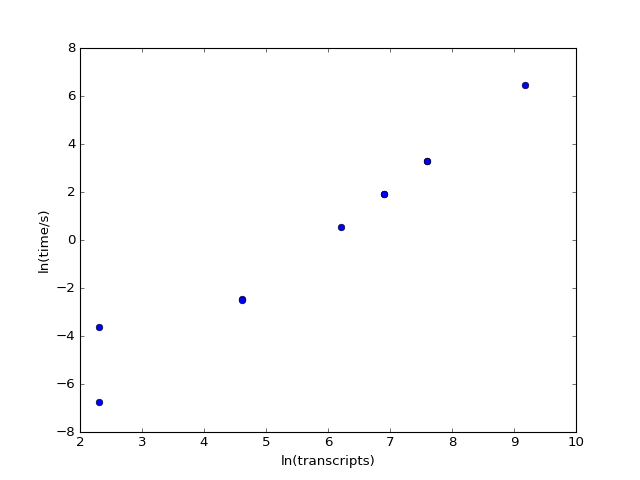

In [6]:
fig = plt.figure()
plt.plot(lN,lt,"bo")
plt.xlabel("ln(transcripts)")
plt.ylabel("ln(time/s)")

Yep, looks linear (but note the noise for very small $N$).

Linear fit:

In [7]:
slope, intercept, r_value, p_value, std_err = linregress(lN,lt)

<IPython.core.display.Javascript object>


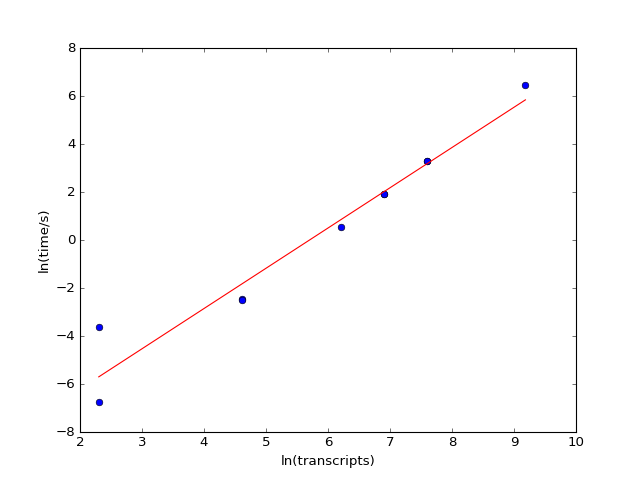

lt = 1.67719934005*lN+-9.56389298638 r = 0.975460684402 p = 1.54021466313e-06 std_err = 0.133842899932


In [8]:
fig = plt.figure()
plt.plot(lN,lt,"bo")
plt.plot([lN[0],lN[-1]],[lN[0]*slope+intercept,lN[-1]*slope+intercept],"r-")
plt.xlabel("ln(transcripts)")
plt.ylabel("ln(time/s)")
print "lt = %s*lN+%s r = %s p = %s std_err = %s" % (slope, intercept, r_value, p_value, std_err)

Nice fit, but note that we underpredict the last data point.  Also note that the slope is smaller than the expected value of 2 (suggesting subquadratic scaling).

Let's drop the noisy small $N$ points and refit:

In [9]:
N = [100.,500.,1000.,2000.,100.,1000.,2000.,9740.]
t = [85.2e-3,1.71,6.71,26.5,80.7e-3,6.83,26.6,10*60.+38]
lN = np.log(N)
lt = np.log(t)
slope, intercept, r_value, p_value, std_err = linregress(lN,lt)

<IPython.core.display.Javascript object>


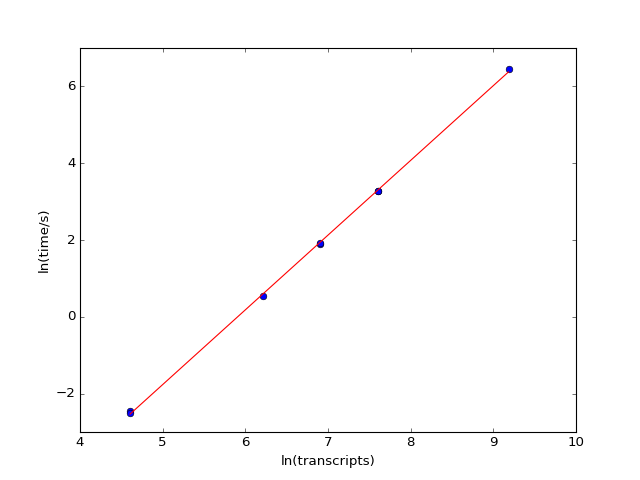

lt = 1.94625008676*lN+-11.4965091461 r = 0.999852079275 p = 8.09056603538e-12 std_err = 0.0136678661159


In [10]:
fig = plt.figure()
plt.plot(lN,lt,"bo")
plt.plot([lN[0],lN[-1]],[lN[0]*slope+intercept,lN[-1]*slope+intercept],"r-")
plt.xlabel("ln(transcripts)")
plt.ylabel("ln(time/s)")
print "lt = %s*lN+%s r = %s p = %s std_err = %s" % (slope, intercept, r_value, p_value, std_err)

Improved fit with better prediction for large $N$.  Also, note that the slope is now close to 2, as expected for quadratic scaling.

Let's plot the curve in the original space:

<IPython.core.display.Javascript object>


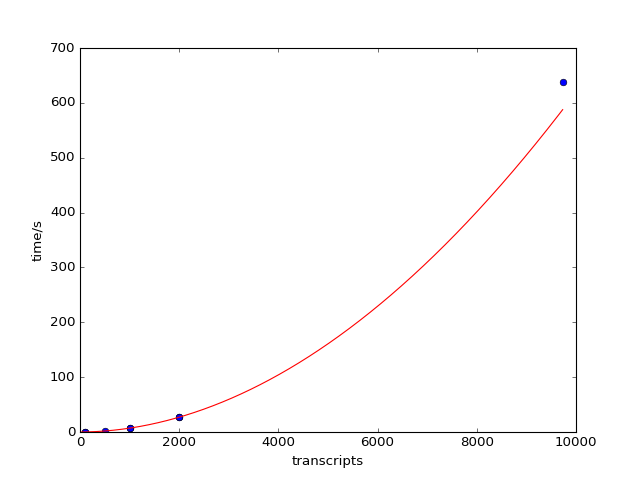

In [11]:
x = np.arange(1,9740,10)
y = np.exp(np.log(x)*slope+intercept)
fig = plt.figure()
plt.plot(N,t,"bo")
plt.plot(x,y,"r-")
plt.xlabel("transcripts")
plt.ylabel("time/s")

Note that we're still slightly underpredicting large $N$.  We could try improving our linear estimate with non-linear regression or by collecting additional data between 4000 and 8000, but this is good enough for a rough extrapolation.

What is our prediction for the full matrix?

In seconds:

In [12]:
44339*slope+intercept

86283.286087839879

In days:

In [13]:
(44339*slope+intercept)/60./60./24.

0.99864914453518372

So, last night's estimate was too high.  The full calculation would take a bit more than a day.

(Given sufficient memory)